Training data shape:  (78960, 28, 28)
Test data shape (33840, 28, 28)
y_train.shape = (78960,)
(78960, 784)
(78960,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 62)                18662     
                                                                 
Total params: 254,162
Trainable params: 254,162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2221/2221 [==============================] - 12s 5ms/step - loss: 1.0692 - accuracy: 0.6891 - val_loss: 0.7347 - val_accuracy: 0.7708
Epoch 2/20
2221/2221 [==============================] - 11s 5ms/step - loss: 0.6302 - accuracy: 0.8007 - val_loss: 0.5919 - val_accuracy: 0.8145
Epoch 3/20
2221/2221 [=================

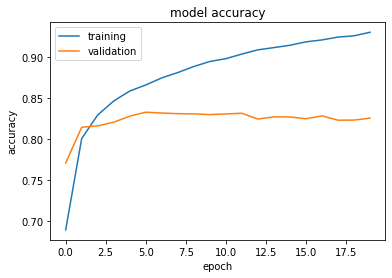

Test loss: 0.794


In [1]:
from emnist import list_datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from emnist import extract_training_samples, extract_test_samples
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

#Balanced : 47 class, each has 2400 training samples (112800) and 400 test samples (18800)
test_data, test_label =  extract_test_samples("balanced")
images, labels = extract_training_samples("balanced")
images.shape
my_data = images
my_label = labels
x_train, x_test,y_train, y_test = train_test_split(my_data,my_label,test_size = 0.3, random_state = 365,stratify = labels)
print("Training data shape: ", x_train.shape) 
print("Test data shape", x_test.shape)
print("y_train.shape =",y_train.shape)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Flatten the images
image_vector_size = 28*28
image_size = 784
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

num_classes = 47

print(x_train.shape)
print(y_train.shape)

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=300, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=62, activation ="softmax"))


model.summary()

# x_train = x_train.reshape(x_train.shape[0], image_vector_size)
# x_test = x_test.reshape(x_test.shape[0], image_vector_size)


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
acc = history.history['val_accuracy']
print(acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


print(f'Test loss: {loss:.3}')

In [14]:
print(labels.shape)
print(y_train.shape)
print(y_test.shape)

(112800,)
(56400,)
(56400,)


100%|█████████████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 681.89it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


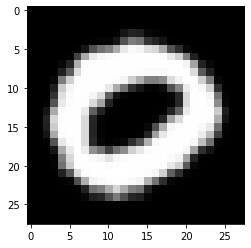

In [5]:
from tqdm import tqdm
tmp=[]
labels_tolist = labels.tolist()
for i in tqdm(range(47)):
    if labels_tolist.count(i) != 2300:
        tmp.append(i)
print(tmp)
for i in range(len(x_train)):
    if y_train[i] == 24:
        tmp = x_train[i].reshape(28,28)
        plt.imshow(tmp, cmap="gray")
        break

In [6]:
import matplotlib.pyplot as plt
import itertools

def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

cnf_matrix = my_confusion_matrix(y_test, classes_x)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())


normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis = 1, keepdims = True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)


from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, classes_x)
print('Confusion matrix:')
print(cnf_matrix)




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)
    f = plt.figure()
    f.set_figwidth(150)
    f.set_figheight(150)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = []
for i in range(47):
  class_names.append(i)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'classes_x' is not defined

In [16]:
new_model = keras.models.load_model("my_model")


In [17]:
print(x_test.shape)
print()

(22560, 784)
